In [74]:
import cv2
import os
import re
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

In [75]:
GMM_dir = os.path.join("results", "GMM")
mask = cv2.imread("results/GMM/GMM_68.jpg") # cv2 read img as BGR
# cv2.imshow("mask",mask)
# cv2.waitKey()

In [76]:
# calculate orange pixels:
mask = cv2.inRange(mask,(20,20,20),(240,240,240) )
# cv2.imshow("mask",mask)
# cv2.waitKey()
none_black_pixel = cv2.countNonZero(mask)
print("here: ", none_black_pixel)

here:  1730


In [77]:
cv2.imshow("mask",mask)
cv2.waitKey(1)

-1

In [78]:
# GET a list of distance
dis_list = []
num_list= []

for img_name in os.listdir(GMM_dir):
    dis = int(re.search(r"GMM_([0-9]+)\.jpg",img_name)[1])
    mask = cv2.imread(os.path.join(GMM_dir, img_name))
    num_pixel = cv2.countNonZero(cv2.inRange(mask,(20,20,20),(240,240,240) ))
    dis_list.append(dis)
    num_list.append(num_pixel)
train_list = list(zip(num_list, dis_list))
train_list.sort()

[(143, 280), (144, 264), (160, 248), (163, 256), (194, 223), (205, 231), (206, 208), (219, 216), (228, 200), (270, 192), (302, 176), (317, 168), (359, 160), (387, 152), (421, 144), (439, 137), (595, 121), (640, 114), (686, 106), (799, 99), (996, 91), (1416, 76), (1730, 68)]


parames:  [3.53948784e+02 3.66995684e-05]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


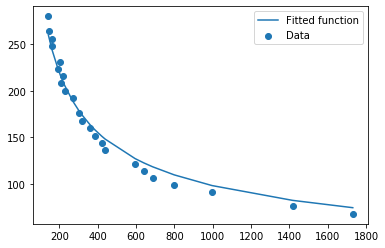

In [79]:
def inverse_square(x,a,b):
    return np.sqrt(a/b/x)

params, _ = optimize.curve_fit(inverse_square, *zip(*train_list))
print("parames: ", params)
plt.scatter(*zip(*train_list), label='Data')
plt.plot(list(zip(*train_list))[0], inverse_square(list(zip(*train_list))[0], params[0],params[1]), label='Fitted function')
plt.legend(loc='best')

plt.show()

In [83]:
# Predict distance for test set images
test_dir = os.path.join("results", "GMM_test")
output_dir = os.path.join("results", "distance")
for img_name in os.listdir(test_dir):
    mask = cv2.imread(os.path.join(test_dir, img_name))
    num_pixel = cv2.countNonZero(cv2.inRange(mask,(20,20,20),(240,240,240)))
    predicted_dist = inverse_square(num_pixel, *params)
    print(predicted_dist)
    h, w, _ = mask.shape
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(mask, "D = {}".format(predicted_dist), (int(h/5), int(w/5)), font, 0.5, (225, 225, 225), 1)
    img_name = os.path.join(output_dir, "Distance_" + str(img_name))
    cv2.imwrite(img_name, img)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-4jcifzim/opencv/modules/core/src/arithm.cpp:1743: error: (-215:Assertion failed) ! _src.empty() in function 'inRange'
